In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'D:\python\Data Science\Python\E-Commerce Sales Analysis\data\datasets\International sale Report.csv'
data = pd.read_csv(file_path)

In [2]:
# Data Preprocessing: Ensure 'GROSS AMT' is numeric
data['GROSS AMT'] = pd.to_numeric(data['GROSS AMT'], errors='coerce')

# Basic Data Exploration
print("Basic data overview:")
print(data.describe())

Basic data overview:
              index     GROSS AMT
count  37432.000000  36391.000000
mean   18715.500000    450.539946
std    10805.831975    597.808652
min        0.000000      0.000000
25%     9357.750000     11.000000
50%    18715.500000    340.000000
75%    28073.250000    681.000000
max    37431.000000   9745.000000


In [3]:
# Insight 1: Top 10 Customers by Sales
top_customers = data.groupby('CUSTOMER')['GROSS AMT'].sum().nlargest(10).reset_index()
print("\nTop 10 Customers by Sales:")
print(top_customers)


Top 10 Customers by Sales:
                             CUSTOMER  GROSS AMT
0                 MULBERRIES BOUTIQUE  2094070.5
1   AMANI CONCEPT TRADING LLC (KAPDA)   930451.0
2                  VAHARSHA BOUTIQUE    527214.0
3  GALAXY GROUP OF COMPANIES PVT. LTD   445058.0
4                          RIVAAN LLC   443042.0
5                   SURE FASHIONS LLC   403253.0
6            BHANU SALEINE NAUNITHAM    356998.0
7                   COTTON CLOSET LTD   345265.0
8                         VISHA DEVAN   321028.0
9                   NIRUSAH TAILORING   316470.0


Unique values in DATE column before cleaning:
<DatetimeArray>
['2021-06-05 00:00:00', '2021-06-08 00:00:00', '2021-06-11 00:00:00',
 '2021-06-15 00:00:00', '2021-06-17 00:00:00', '2021-06-18 00:00:00',
 '2021-06-19 00:00:00', '2021-06-23 00:00:00', '2021-06-24 00:00:00',
 '2021-06-28 00:00:00',
 ...
 '2022-04-27 00:00:00', '2022-04-28 00:00:00', '2022-04-29 00:00:00',
 '2022-04-30 00:00:00', '2022-05-06 00:00:00', '2022-05-07 00:00:00',
 '2022-05-09 00:00:00', '2022-05-10 00:00:00', '2022-05-11 00:00:00',
                 'NaT']
Length: 163, dtype: datetime64[ns]
Rows with invalid DATE values:
       index DATE    Months CUSTOMER     Style              SKU  Size  \
18635  18635  NaT       NaN      NaN       NaN              NaN   NaN   
18636  18636  NaT       NaN      NaN       NaN              NaN   NaN   
18637  18637  NaT       NaN      NaN       NaN              NaN   NaN   
18638  18638  NaT       NaN      NaN       NaN              NaN   NaN   
18639  18639  NaT       NaN      N

C:\Users\dell\AppData\Local\Temp\ipykernel_19056\3849404837.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['GROSS AMT'] = pd.to_numeric(data_clean['GROSS AMT'], errors='coerce')


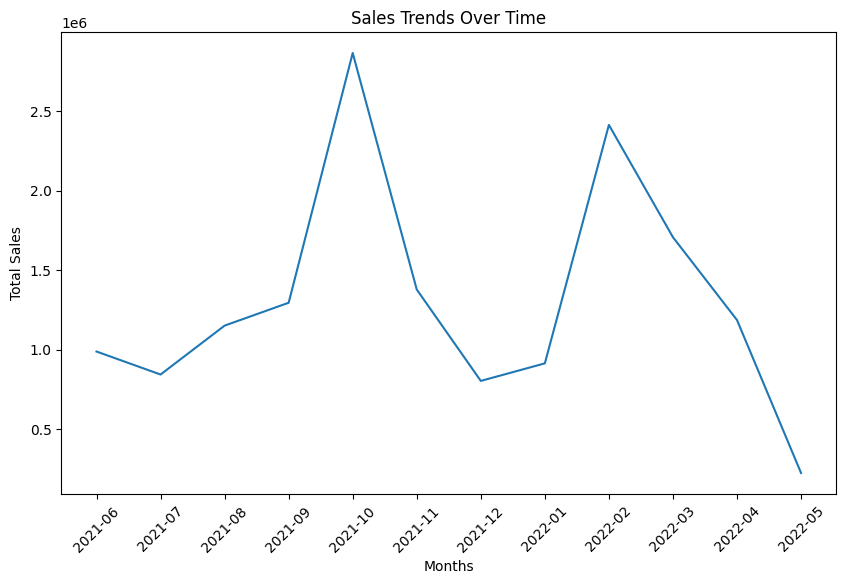

In [11]:
# Insight 2: Sales Trends Over Time
# Step 1: Check the unique values in the DATE column to find non-date entries
print("Unique values in DATE column before cleaning:")
print(data['DATE'].unique())

# Step 2: Convert the DATE column, forcing invalid entries to NaT
data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce')

# Check for rows that couldn't be converted to dates
invalid_dates = data[data['DATE'].isna()]
print("Rows with invalid DATE values:")
print(invalid_dates)

# Step 3: Remove rows where 'DATE' is NaT (invalid date entries)
data_clean = data.dropna(subset=['DATE'])

# Step 4: Clean the GROSS AMT column by converting to numeric, forcing invalid values to NaN
data_clean['GROSS AMT'] = pd.to_numeric(data_clean['GROSS AMT'], errors='coerce')

# Step 5: Remove rows where 'GROSS AMT' is NaN (invalid amounts)
data_clean = data_clean.dropna(subset=['GROSS AMT'])

# Step 6: Group by month and calculate total sales
data_clean['Months'] = data_clean['DATE'].dt.to_period('M')  # Create a new 'Months' column
monthly_sales = data_clean.groupby('Months')['GROSS AMT'].sum().reset_index()

# Convert 'Months' to string for plotting
monthly_sales['Months'] = monthly_sales['Months'].astype(str)

# Step 7: Plot sales trends over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Months', y='GROSS AMT', data=monthly_sales)
plt.title('Sales Trends Over Time')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.show()



Top 10 SKUs by Sales Amount:
               SKU  GROSS AMT
0   SET268-KR-NP-L    54772.0
1      J0277-SKD-S    43676.0
2      J0277-SKD-M    38585.0
3   SET268-KR-NP-M    37566.0
4  SET268-KR-NP-XL    34102.0
5   SET268-KR-NP-S    30758.0
6   SET252-KR-PP-L    26320.0
7   SET110-KR-PP-S    25849.0
8   SET110-KR-PP-M    25788.0
9  SET252-KR-PP-S.    24911.0


C:\Users\dell\AppData\Local\Temp\ipykernel_19056\1095862849.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GROSS AMT', y='SKU', data=top_skus, palette='viridis')


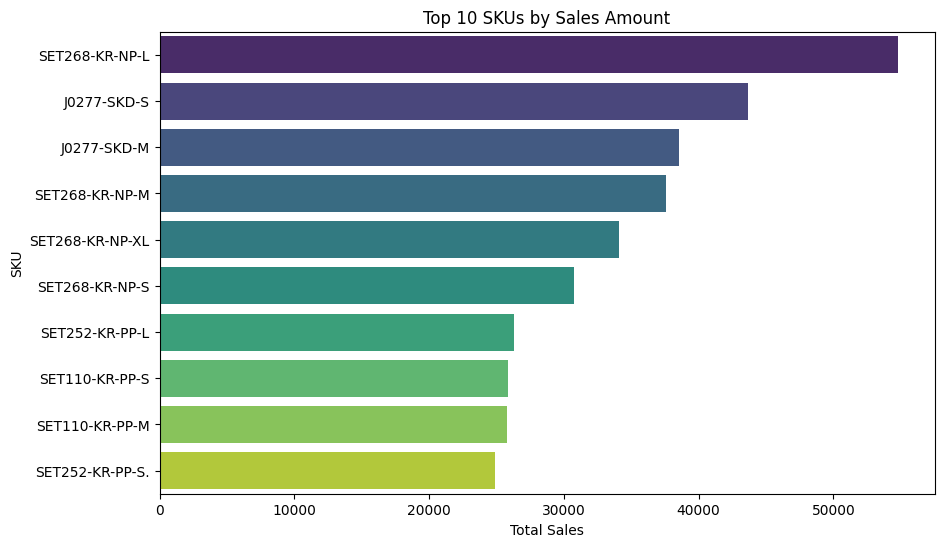

In [6]:
# Insight 3: Top SKUs by Sales Amount
top_skus = data.groupby('SKU')['GROSS AMT'].sum().nlargest(10).reset_index()
print("\nTop 10 SKUs by Sales Amount:")
print(top_skus)

# Plot: Top SKUs by Sales Amount
plt.figure(figsize=(10, 6))
sns.barplot(x='GROSS AMT', y='SKU', data=top_skus, palette='viridis')
plt.title('Top 10 SKUs by Sales Amount')
plt.xlabel('Total Sales')
plt.ylabel('SKU')
plt.show()


Number of repeat customers: 135


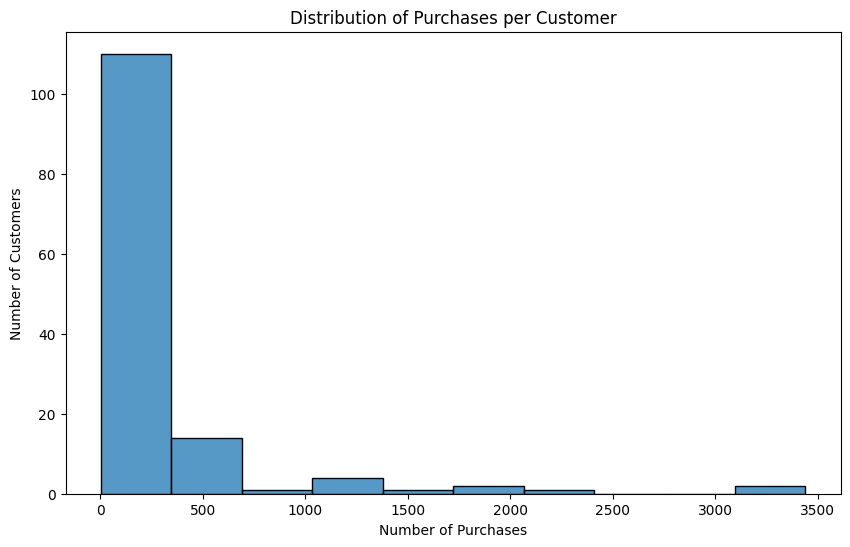

In [7]:
# Insight 4: Repeat Customers Analysis
repeat_customers = data.groupby('CUSTOMER')['SKU'].count().reset_index()
repeat_customers = repeat_customers[repeat_customers['SKU'] > 1]
print(f"\nNumber of repeat customers: {len(repeat_customers)}")

# Plot: Distribution of purchases per customer
plt.figure(figsize=(10, 6))
sns.histplot(repeat_customers['SKU'], bins=10, kde=False)
plt.title('Distribution of Purchases per Customer')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()


***Key Insights and Conclusions:***

Top Customers: The top 10 customers contributed significantly to overall sales. This suggests that a small percentage of customers may account for a large portion of revenue, indicating potential for loyalty programs or special deals to retain these key customers.

Recommendation: Consider creating personalized marketing strategies or loyalty programs for these top customers to enhance engagement and retention.
Sales Trends: The sales trend visualization showed peaks and dips over time. Identifying these patterns can help predict future sales and plan for high-demand periods.

Recommendation: Stock up on popular products before expected peak periods and consider offering promotions during low-sales periods to boost revenue.
Top-Performing Products: Certain SKUs generate significantly more revenue than others, indicating that these products are in high demand.

Recommendation: Invest more in promoting and stocking top-performing products. Use these products in marketing campaigns to attract attention.
Customer Behavior: Analysis of repeat customers showed a substantial number of customers making multiple purchases, suggesting a high level of customer loyalty.

Recommendation: Implement retention strategies such as discount codes for repeat purchases, referral programs, or post-purchase follow-up emails to encourage additional sales.